In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

617

In [6]:
# Import the datetime module from the datetime library
from datetime import datetime

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | castro verde
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | boguchany
Processing Record 11 of Set 1 | severnyy
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | moose factory
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | tyler
Processing Record 19 of Set 1 | urumqi
Processing Record 20 of Set 1 | lazaro cardenas
Processing Record 21 of Set 1 | kismayo
Processing R

Processing Record 39 of Set 4 | sioux lookout
Processing Record 40 of Set 4 | usinsk
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | bull savanna
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | rumonge
Processing Record 45 of Set 4 | payson
Processing Record 46 of Set 4 | jackson
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | acarau
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | buariki
City not found. Skipping...
Processing Record 1 of Set 5 | zhezkazgan
Processing Record 2 of Set 5 | veinticinco de mayo
Processing Record 3 of Set 5 | duku
Processing Record 4 of Set 5 | goya
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | carauari
Processing Record 8 of Set 5 | avera
Processing Record 9 of Set 5 | marawi
Processing Record 10 of Set 5 | saskylakh
Processin

Processing Record 26 of Set 8 | beringovskiy
Processing Record 27 of Set 8 | loum
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | faya
Processing Record 31 of Set 8 | menongue
Processing Record 32 of Set 8 | karaul
City not found. Skipping...
Processing Record 33 of Set 8 | mendahara
City not found. Skipping...
Processing Record 34 of Set 8 | kadom
Processing Record 35 of Set 8 | shetpe
Processing Record 36 of Set 8 | neiafu
Processing Record 37 of Set 8 | aksarka
Processing Record 38 of Set 8 | tilichiki
Processing Record 39 of Set 8 | junagarh
Processing Record 40 of Set 8 | gazanjyk
Processing Record 41 of Set 8 | nadym
Processing Record 42 of Set 8 | ayagoz
Processing Record 43 of Set 8 | the hague
Processing Record 44 of Set 8 | tibana
Processing Record 45 of Set 8 | loukhi
Processing Record 46 of Set 8 | kralendijk
Processing Record 47 of Set 8 | la sarre
Processing Record 48 of Set 8 | banda aceh
Processing Re

Processing Record 16 of Set 12 | nsunga
Processing Record 17 of Set 12 | goderich
Processing Record 18 of Set 12 | asau
Processing Record 19 of Set 12 | preobrazheniye
Processing Record 20 of Set 12 | aljezur
Processing Record 21 of Set 12 | laguna
Processing Record 22 of Set 12 | dawei
Processing Record 23 of Set 12 | netarhat
Processing Record 24 of Set 12 | wagar
Processing Record 25 of Set 12 | ponta do sol
Processing Record 26 of Set 12 | sovetskiy
Processing Record 27 of Set 12 | presidencia roque saenz pena
Processing Record 28 of Set 12 | kawalu
Processing Record 29 of Set 12 | djambala
Processing Record 30 of Set 12 | miquelon
Processing Record 31 of Set 12 | fredericton
Processing Record 32 of Set 12 | plettenberg bay
Processing Record 33 of Set 12 | hervey bay
Processing Record 34 of Set 12 | aleksandrovskoye
Processing Record 35 of Set 12 | charagua
Processing Record 36 of Set 12 | staryy nadym
Processing Record 37 of Set 12 | vargashi
Processing Record 38 of Set 12 | auki


In [10]:
len(city_data)

567

In [11]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,86.00,35,0,13.80,AR,2021-01-18 22:40:20
1,Constitucion,-35.3333,-72.4167,65.86,61,0,7.96,CL,2021-01-18 22:40:20
2,Castro Verde,37.6983,-8.0858,48.00,81,0,2.30,PT,2021-01-18 22:40:20
3,Ushuaia,-54.8000,-68.3000,51.80,66,75,13.80,AR,2021-01-18 22:38:09
4,Yellowknife,62.4560,-114.3525,5.00,85,90,10.36,CA,2021-01-18 22:36:49
5,Mataura,-46.1927,168.8643,53.01,94,100,5.99,NZ,2021-01-18 22:40:21
6,Avarua,-21.2078,-159.7750,78.80,78,75,9.22,CK,2021-01-18 22:40:21
7,Boguchany,58.3814,97.4531,11.26,92,100,9.19,RU,2021-01-18 22:40:21
8,Severnyy,50.6770,36.5532,6.80,85,90,2.24,RU,2021-01-18 22:40:21
9,Hobart,-42.8794,147.3294,55.00,50,75,17.27,AU,2021-01-18 22:38:49


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-01-18 22:40:20,-38.0023,-57.5575,86.00,35,0,13.80
1,Constitucion,CL,2021-01-18 22:40:20,-35.3333,-72.4167,65.86,61,0,7.96
2,Castro Verde,PT,2021-01-18 22:40:20,37.6983,-8.0858,48.00,81,0,2.30
3,Ushuaia,AR,2021-01-18 22:38:09,-54.8000,-68.3000,51.80,66,75,13.80
4,Yellowknife,CA,2021-01-18 22:36:49,62.4560,-114.3525,5.00,85,90,10.36
5,Mataura,NZ,2021-01-18 22:40:21,-46.1927,168.8643,53.01,94,100,5.99
6,Avarua,CK,2021-01-18 22:40:21,-21.2078,-159.7750,78.80,78,75,9.22
7,Boguchany,RU,2021-01-18 22:40:21,58.3814,97.4531,11.26,92,100,9.19
8,Severnyy,RU,2021-01-18 22:40:21,50.6770,36.5532,6.80,85,90,2.24
9,Hobart,AU,2021-01-18 22:38:49,-42.8794,147.3294,55.00,50,75,17.27


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

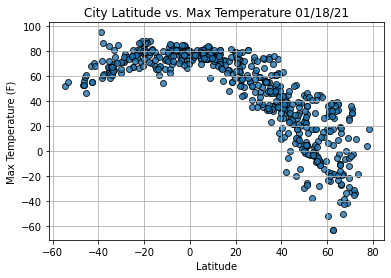

In [17]:
# Import time module 
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lat,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

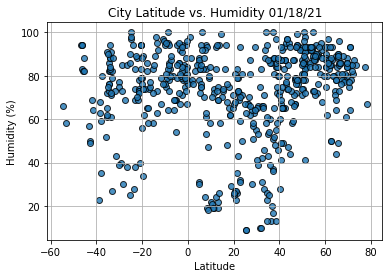

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

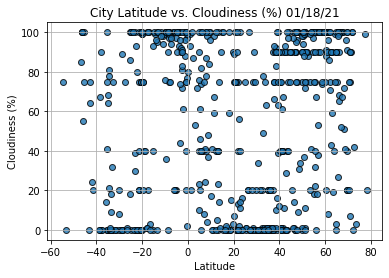

In [20]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(lat,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

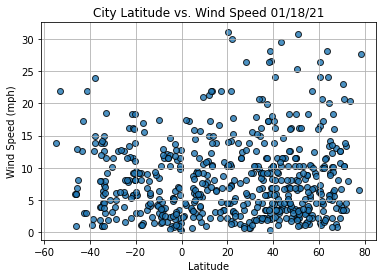

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()